In [1]:
import os.path as osp
import os

import torch
from sklearn.metrics import average_precision_score, roc_auc_score
from torch.nn import Linear

from overflowDataset import OverFlowDataset
from torch_geometric.loader import TemporalDataLoader
from torch_geometric.nn import SAGEConv
from torch_geometric.loader import NeighborLoader
from tqdm import tqdm
from neighbor_sampler import NeighborSampler


In [2]:


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
__file__ = os.path.abspath('')
path = osp.join(osp.dirname(osp.realpath(__file__)), '..', 'data', 'OpenFlow')
dataset = OverFlowDataset(path)
data = dataset[0]

print(data)

# # Ensure to only sample actual destination nodes as negatives.
# min_dst_idx, max_dst_idx = int(data.dst.min()), int(data.dst.max())
# train_data, val_data, test_data = data.train_val_test_split(
#     val_ratio=0.15, test_ratio=0.15)

# train_loader = TemporalDataLoader(train_data, batch_size=200)
# val_loader = TemporalDataLoader(val_data, batch_size=200)
# test_loader = TemporalDataLoader(test_data, batch_size=200)

Using existing file sx-stackoverflow.txt.gz
Extracting /home/zz/Home/data/OpenFlow/stackoverflow/raw/sx-stackoverflow.txt.gz


EOFError: Compressed file ended before the end-of-stream marker was reached

In [ ]:
data.n_id = torch.arange(data.num_nodes)

In [3]:
data.edge_attr

NameError: name 'data' is not defined

In [71]:
from torch_geometric.data import Data
from torch_geometric.utils import *

# Example node features
x = torch.tensor([
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 1]
], dtype=torch.float)

# Example edge indices
# edge_index = torch.tensor([
#     [0, 1, 2, 3, 1],
#     [1, 2, 3, 0, 3]
# ], dtype=torch.long)
edge_index = torch.tensor([
    [0,1],
    [3,3]
], dtype=torch.long)

print(edge_index)
#edge_index = to_undirected(edge_index)
print(edge_index)

# Create PyTorch Geometric data object
test_data = Data(x=x, edge_index=edge_index)
test_data.n_id = torch.arange(6)

tensor([[0, 1],
        [3, 3]])
tensor([[0, 1],
        [3, 3]])


In [76]:
temp_loader = NeighborSampler(test_data.edge_index, sizes=[1, -1], node_idx=torch.tensor([3]), batch_size=1)
for batch_size, ids, adjs in temp_loader:
    print(ids)
    print(adjs)

tensor([3, 0, 1])
[EdgeIndex(edge_index=tensor([[1, 2],
        [0, 0]]), e_id=tensor([0, 1]), size=(3, 2)), EdgeIndex(edge_index=tensor([[1],
        [0]]), e_id=tensor([0]), size=(2, 1))]


In [8]:
test_data

Data(x=[4, 3], edge_index=[2, 2], n_id=[4])

In [6]:
torch.flatten(edge_index.t())

tensor([0, 3, 1, 3])

In [14]:
temp_loader = NeighborSampler(test_data.edge_index, sizes=[2,2], node_idx=test_data.n_id, batch_size=4)
for batch_size, ids, adjs in temp_loader:
    print(ids)
    print(adjs)
    # for i in adjs.edge_index:
    #     print(ids[i[0]], ids[i[1]])

tensor([0, 1, 2, 3])
[EdgeIndex(edge_index=tensor([[3, 3, 0, 1],
        [0, 1, 3, 3]]), e_id=tensor([2, 3, 0, 1]), size=(4, 4)), EdgeIndex(edge_index=tensor([[3, 3, 0, 1],
        [0, 1, 3, 3]]), e_id=tensor([2, 3, 0, 1]), size=(4, 4))]


In [18]:
test_data.edge_index

tensor([[0, 1, 3, 3],
        [3, 3, 0, 1]])

In [9]:
temp_loader = NeighborSampler(test_data.edge_index, sizes=[3,3], node_idx=test_data.n_id, batch_size=1)
for batch_size, ids, adjs in temp_loader:
    print(ids)
    print(adjs)
    # for i in adjs.edge_index:
    #     print(ids[i[0]], ids[i[1]])

tensor([0])
[EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
tensor([1])
[EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
tensor([2])
[EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1)), EdgeIndex(edge_index=tensor([], size=(2, 0), dtype=torch.int64), e_id=tensor([], dtype=torch.int64), size=(1, 1))]
tensor([3, 1, 0])
[EdgeIndex(edge_index=tensor([[1, 2],
        [0, 0]]), e_id=tensor([1, 0]), size=(3, 3)), EdgeIndex(edge_index=tensor([[1, 2],
        [0, 0]]), e_id=tensor([1, 0]), size=(3, 1))]


In [21]:
temp_loader = NeighborSampler(test_data.edge_index, sizes=[-1,-1], node_idx=test_data.n_id, batch_size=1)
for b in temp_loader:
    print(b[1])

tensor([0, 3, 1, 2])
tensor([1, 0, 3])
tensor([2, 1, 0])
tensor([3, 1, 2, 0])


In [6]:
train_loader = NeighborLoader(data, input_nodes=None, num_neighbors=[0], shuffle=False, batch_size=1)

In [7]:
cnt = 0
for b in train_loader:
  cnt += 1
  print(b.n_id[0])
  if cnt ==10:
    break
print(cnt)

tensor(0)
tensor(1)
tensor(2)
tensor(3)
tensor(4)
tensor(5)
tensor(6)
tensor(7)
tensor(8)
tensor(9)
10


In [29]:
sampled_data = next(iter(train_loader))
print(sampled_data.n_id)
sampled_data = next(iter(train_loader))
print(sampled_data.n_id)

tensor([0])
tensor([0])


In [24]:
edge_idx = torch.stack([data.src, data.dst], dim=0)
edge_idx.size()

torch.Size([2, 63497050])

In [9]:
class LinkPredictor(torch.nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.lin_src = Linear(in_channels, in_channels)
        self.lin_dst = Linear(in_channels, in_channels)
        self.lin_final = Linear(in_channels, 1)

    def forward(self, z_src, z_dst):
        h = self.lin_src(z_src) + self.lin_dst(z_dst)
        h = h.relu()
        return self.lin_final(h)

In [10]:
class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        pbar = tqdm(total=len(subgraph_loader.dataset) * len(self.convs))
        pbar.set_description('Evaluating')

        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
                pbar.update(batch.batch_size)
            x_all = torch.cat(xs, dim=0)
        pbar.close()
        return x_all

In [42]:
sampleNum = data.num_nodes

In [48]:
train_loader = NeighborSampler(data.edge_index, sizes=[10,10], node_idx=data.edge_index[0][:sampleNum], batch_size=1000)

In [49]:
from functools import lru_cache

cacheMiss = 0

@lru_cache(maxsize=200000)
def get_value(key):
    global cacheMiss
    cacheMiss +=1

pbar = tqdm(total=sampleNum)
for step, (batch_size, ids, adjs) in enumerate(train_loader):
    for i in ids:
        get_value(int(i))
    pbar.update(batch_size)
pbar.close()


  0%|          | 197500/63497050 [01:37<8:41:39, 2022.35it/s] 


KeyboardInterrupt: 

In [33]:
info = get_value.cache_info()
info.hits + info.misses

7381991

In [32]:
def getHitRatio(info):
    return info.hits / (info.hits + info.misses)

print(getHitRatio(info))

0.8559357495830054


In [34]:
import random

indices = torch.tensor(random.sample(range(len(data.edge_index[0])), sampleNum))
indices = torch.tensor(indices)
sampled_values = data.edge_index[0][indices]


/tmp/ipykernel_1663896/3240484968.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = torch.tensor(indices)


In [35]:
random_loader = NeighborSampler(data.edge_index, sizes=[10,10], node_idx=sampled_values)

In [36]:
from functools import lru_cache

cacheMiss = 0

@lru_cache(maxsize=200000)
def get_value(key):
    global cacheMiss
    cacheMiss +=1

pbar = tqdm(total=sampleNum)
for step, (batch_size, ids, adjs) in enumerate(random_loader):
    for i in ids:
        get_value(int(i))
    pbar.update(1)
pbar.close()

print(cacheMiss)

100%|██████████| 100000/100000 [00:32<00:00, 3047.38it/s]

1760968


In [37]:
info = get_value.cache_info()
info.hits + info.misses

5728813

In [38]:
def getHitRatio(info):
    return info.hits / (info.hits + info.misses)

print(getHitRatio(info))

0.692612064663308


Text(0, 0.5, 'Cache hit ratio %')

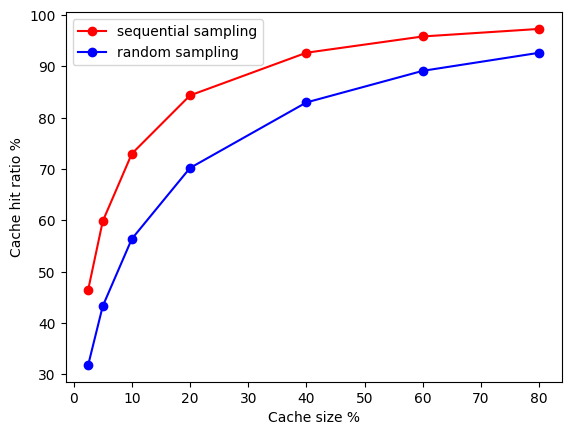

In [11]:
xs = [2.5, 5, 10, 20, 40, 60, 80]
sequent = [46.49, 59.83, 72.99, 84.35, 92.67, 95.84, 97.31]
rand = [31.82, 43.28, 56.39, 70.21, 82.98, 89.14, 92.66]

import numpy as np
import matplotlib.pyplot as plt

plt.plot(xs, sequent, 'o-', color='red', label="sequential sampling")
plt.plot(xs, rand, 'o-', color='blue', label="random sampling")
plt.legend()
plt.xlabel('Cache size %')
plt.ylabel('Cache hit ratio %')
